In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("/Users/samidhachari/Downloads/pythonML/Project/Context_Engine/scripts/driver_context_dataset.csv")
data.head(5)

,fatigue_level,stress_level,battery_level,speed,location_type,traffic_level,time_of_day,risk_level
0,8,6,54,74,city,medium,night,high
1,3,4,47,6,rural,medium,morning,low
2,6,7,41,92,city,low,night,medium
3,9,3,6,53,rural,medium,night,high
4,5,9,98,58,city,low,afternoon,medium


In [5]:
data.shape

(1000, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   fatigue_level  1000 non-null   int64 
 1   stress_level   1000 non-null   int64 
 2   battery_level  1000 non-null   int64 
 3   speed          1000 non-null   int64 
 4   location_type  1000 non-null   object
 5   traffic_level  1000 non-null   object
 6   time_of_day    1000 non-null   object
 7   risk_level     1000 non-null   object
dtypes: int64(4), object(4)
memory usage: 62.6+ KB


In [7]:
data.isnull().sum()

fatigue_level    0
stress_level     0
battery_level    0
speed            0
location_type    0
traffic_level    0
time_of_day      0
risk_level       0
dtype: int64

In [8]:
data.describe()

,fatigue_level,stress_level,battery_level,speed
count,1000.000000,1000.00000,1000.00000,1000.000000
mean,5.079000,5.52100,51.48100,60.588000
std,2.434479,2.85512,27.90384,34.728437
min,1.000000,1.00000,5.00000,0.000000
25%,3.000000,3.00000,27.75000,30.750000
50%,5.000000,6.00000,51.00000,62.000000
75%,7.000000,8.00000,74.25000,92.000000
max,10.000000,10.00000,100.00000,120.000000


In [9]:
data['risk_level'].value_counts()

risk_level
low       568
medium    231
high      201
Name: count, dtype: int64

In [10]:
data.columns

Index(['fatigue_level', 'stress_level', 'battery_level', 'speed',
       'location_type', 'traffic_level', 'time_of_day', 'risk_level'],
      dtype='object')

In [11]:
# class imbalance
data['risk_level'].value_counts(normalize=True)

risk_level
low       0.568
medium    0.231
high      0.201
Name: proportion, dtype: float64

In [12]:
data['traffic_level'].value_counts(normalize=True)

traffic_level
medium    0.344
high      0.338
low       0.318
Name: proportion, dtype: float64

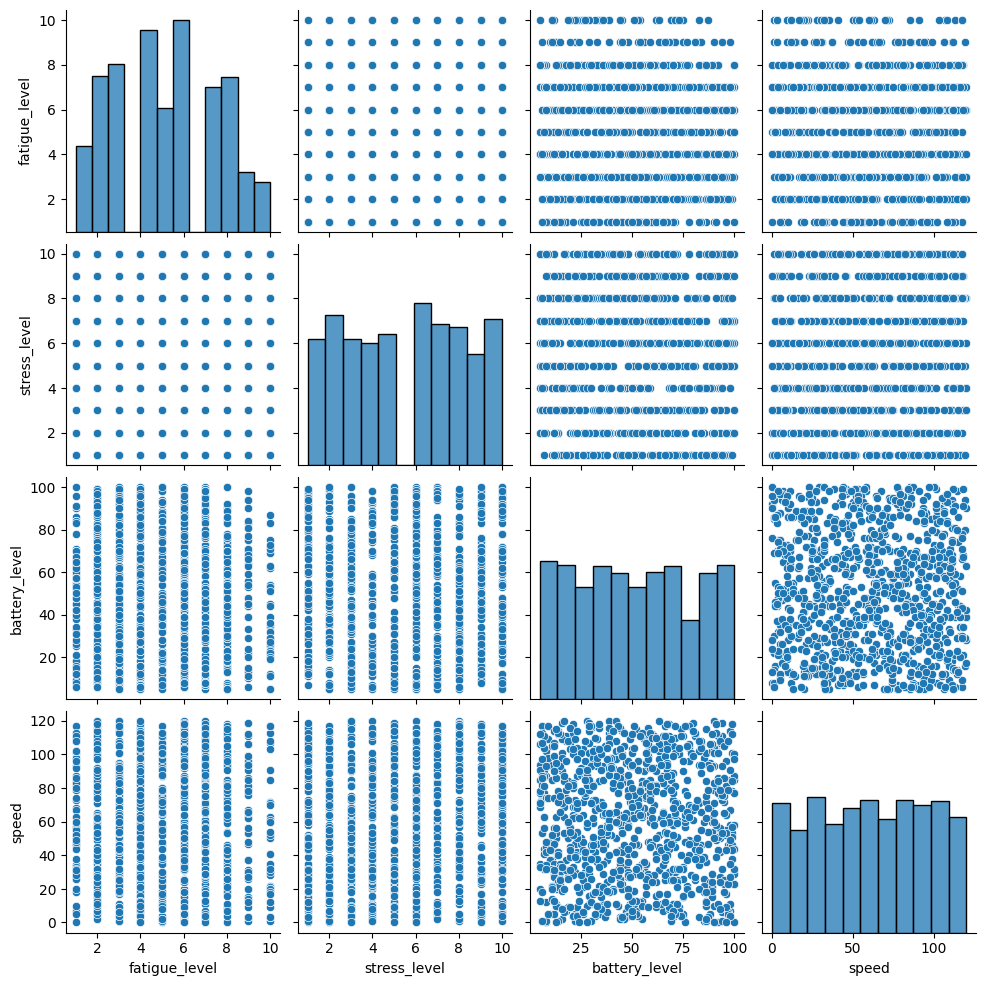

In [13]:
# correlation
sns.pairplot(data)
plt.show()

In [14]:
data.columns

Index(['fatigue_level', 'stress_level', 'battery_level', 'speed',
       'location_type', 'traffic_level', 'time_of_day', 'risk_level'],
      dtype='object')

In [15]:
# preprocessing convet categorical into numerical

from sklearn.preprocessing import LabelEncoder

def preprocess_data(data):
    df = data.copy()

    categorical_cols = ["location_type", "traffic_level", "time_of_day"]
    encoders = {}

    for cols in categorical_cols:
        lb = LabelEncoder()
        df[cols] = lb.fit_transform(df[cols])
        encoders[cols] = lb
    
    target_encoder = LabelEncoder()
    df['risk_level'] = target_encoder.fit_transform(df['risk_level'])

    return df,encoders,target_encoder

In [16]:
# Train Model Decision Tree 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import joblib
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

df,encoders,target_encoder = preprocess_data(data)

x = df.drop(columns=['risk_level'],axis=1)
y = df['risk_level']

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(max_depth=5,random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
joblib.dump(model,"risk_model.pkl")
print("model trained and saved")


model trained and saved


In [17]:
# Evaluation

print("Classification Report:")
print(classification_report(y_test,y_pred))
print("Accuracy Score: ",accuracy_score(y_test,y_pred)*100)
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       1.00      1.00      1.00       111
           2       1.00      0.98      0.99        47

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      1.00       200

Accuracy Score:  99.5
Confusion Matrix:
[[ 42   0   0]
 [  0 111   0]
 [  1   0  46]]


In [18]:
# Hyperparameter Tuning tune important knobs

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    "max_depth": [3, 5, 7, 10],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"]
}

grid = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid,
    cv=5,
    scoring="f1_weighted"
)

grid.fit(x_train, y_train)

print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


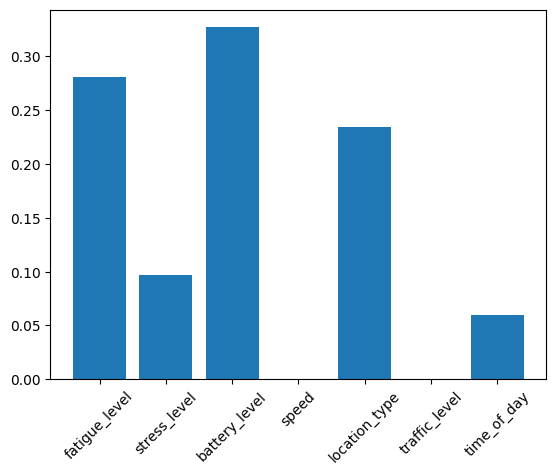

In [19]:
# Feature Importance

importances = model.feature_importances_
plt.bar(x.columns, importances)
plt.xticks(rotation=45)
plt.show()

In [46]:

data = pd.read_csv("scripts/driver_context_dataset.csv")

# Create encoders
location_encoder = LabelEncoder()
traffic_encoder = LabelEncoder()
time_encoder = LabelEncoder()
target_encoder = LabelEncoder()

# Encode features
data["location_type"] = location_encoder.fit_transform(data["location_type"])
data["traffic_level"] = traffic_encoder.fit_transform(data["traffic_level"])
data["time_of_day"] = time_encoder.fit_transform(data["time_of_day"])
data["risk_level"] = target_encoder.fit_transform(data["risk_level"])

# Features
x = data.drop("risk_level", axis=1)
y = data["risk_level"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

model = DecisionTreeClassifier(max_depth=5)
model.fit(x_train, y_train)


joblib.dump(model, "risk_model1.pkl")
joblib.dump(location_encoder, "location_encoder.pkl")
joblib.dump(traffic_encoder, "traffic_encoder.pkl")
joblib.dump(time_encoder, "time_encoder.pkl")
joblib.dump(target_encoder, "target_encoder.pkl")

print("Model and encoders saved successfully!")

Model and encoders saved successfully!


In [47]:
class RiskModelService:
    def __init__(self, model_path="risk_model1.pkl"):
        self.model = joblib.load(model_path)

    def predict(self, features: dict):
        feature_order = [
            "fatigue_level",
            "stress_level",
            "battery_level",
            "speed",
            "location_type",
            "traffic_level",
            "time_of_day"
        ]

        input_vector = np.array([features[f] for f in feature_order]).reshape(1, -1)

        prediction = self.model.predict(input_vector)[0]

        # Confidence score (probability)
        if hasattr(self.model, "predict_proba"):
            probs = self.model.predict_proba(input_vector)[0]
            confidence = float(max(probs))
        else:
            confidence = 1.0  # fallback

        return prediction, confidence

NameError: name 'encoded_features' is not defined